In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Padding a 3D mesh

This notebook shows how to pad a 3D mesh. Note that padding a 3d mesh is done on the contour (before tetrahedralization).

### Generating some data

This cell generates a simple 3d volume.

(48, 120, 72)


<IPython.core.display.Javascript object>


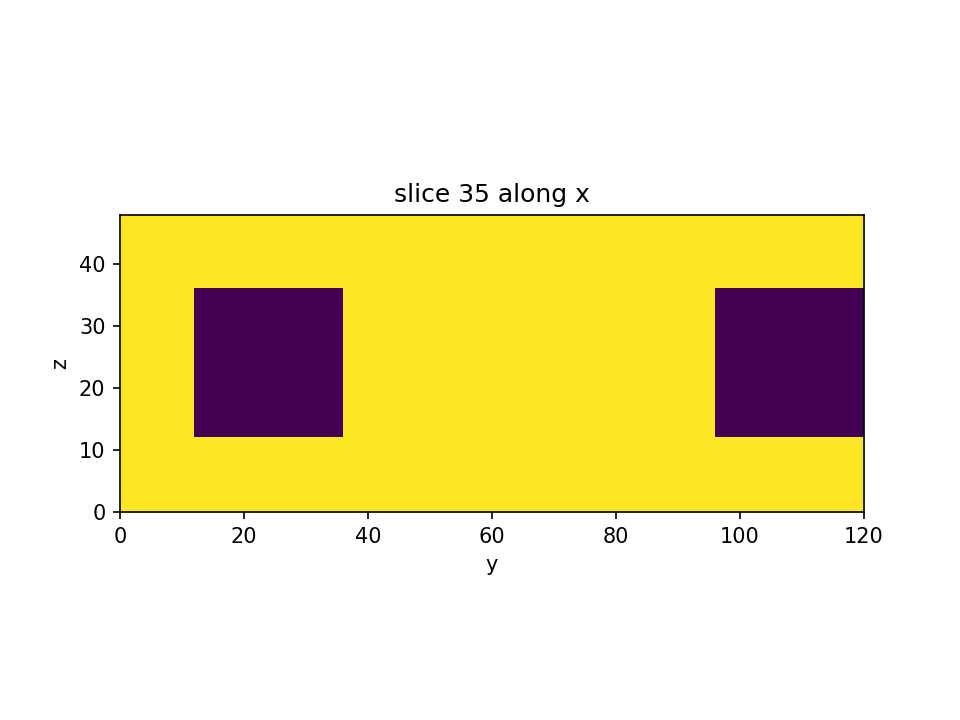

interactive(children=(IntSlider(value=35, description='index', max=71), RadioButtons(description='along', opti…

In [2]:
import numpy as np
from nanomesh import Volume

n = 24
m = 12

data = np.ones([2*n, 5*n, 3*n], dtype=int)
data[m:3*m, m:3*m, 0:3*n] = 0
data[m:3*m, 4*n:5*n, 0:3*n] = 0

print(data.shape)

vol = Volume(data)
vol.show_slice()

### Generating the contour

Generated contour with 24678 cells


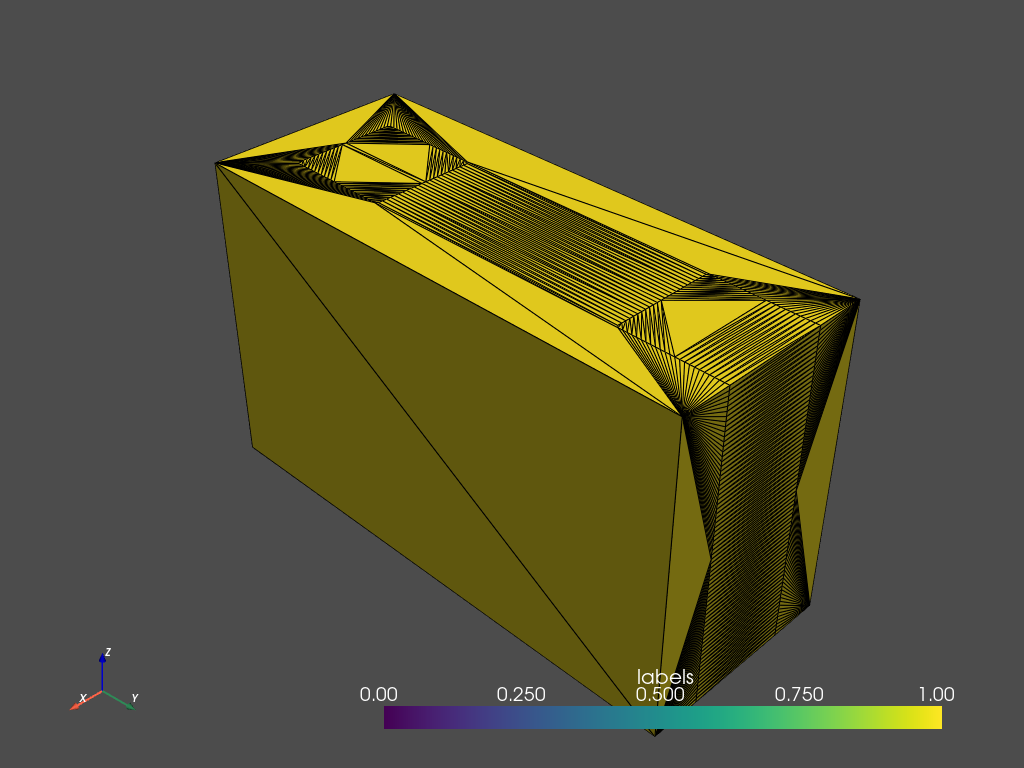

In [3]:
from nanomesh import Mesher3D

mesher = Mesher3D(vol)
mesher.generate_contour()
mesher.plot_contour(jupyter_backend='static', show_edges=True)

### Padding different sides

The mesh can be padded using a similar API as 2d meshes. Each side (top/bottom, left/right, front/back) can be padded. A width must be specified.

Regions are labeled with a number. If no label is given, an arbitrary number is assigned. This is used to identify different regions in the mesh.

Note that tetgen will assign a different label for physically separate
regions, even when they are given the same label/name.

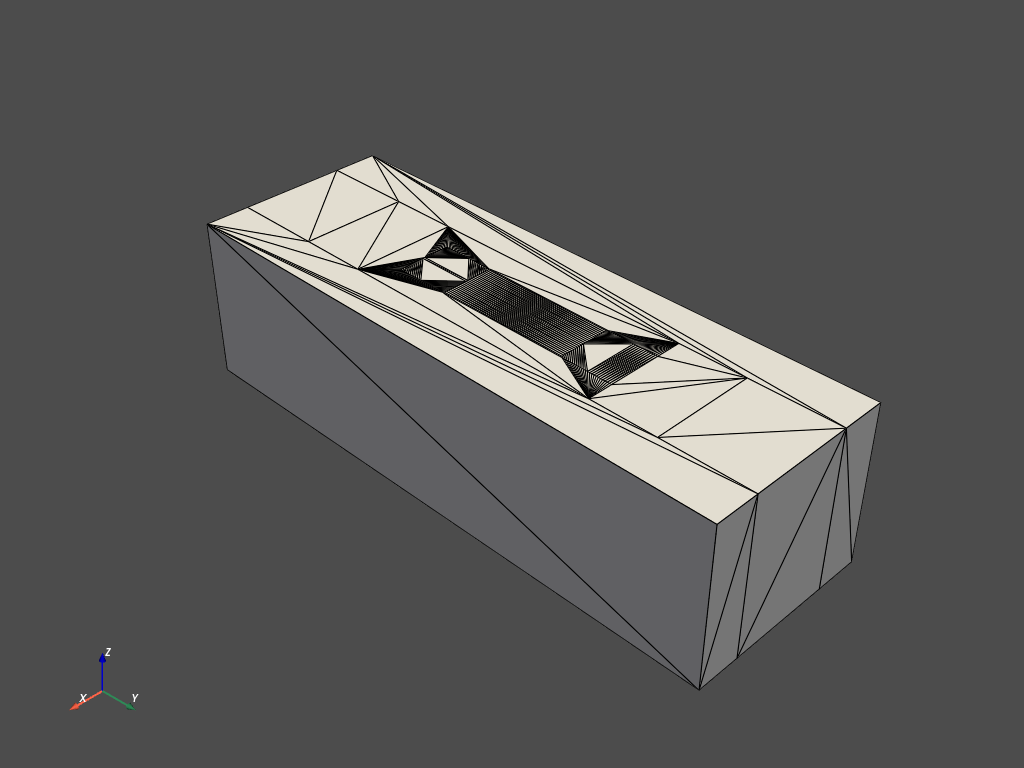

In [4]:
mesher.pad_contour(side='left', width=30, label=-1, name='left inner pad')
mesher.pad_contour(side='left', width=40, label=-2, name='left outer pad')
mesher.pad_contour(side='right', width=30, label=-3, name='right inner pad')
mesher.pad_contour(side='right', width=40, label=-4, name='right outer pad')

mesher.pad_contour(side='front', width=20, label=-5)
mesher.pad_contour(side='back', width=20, label=-6)
mesher.plot_contour(jupyter_backend='static', show_edges=True)

### Generate tetrahedral mesh

Finally, generate the tetrahedral mesh.

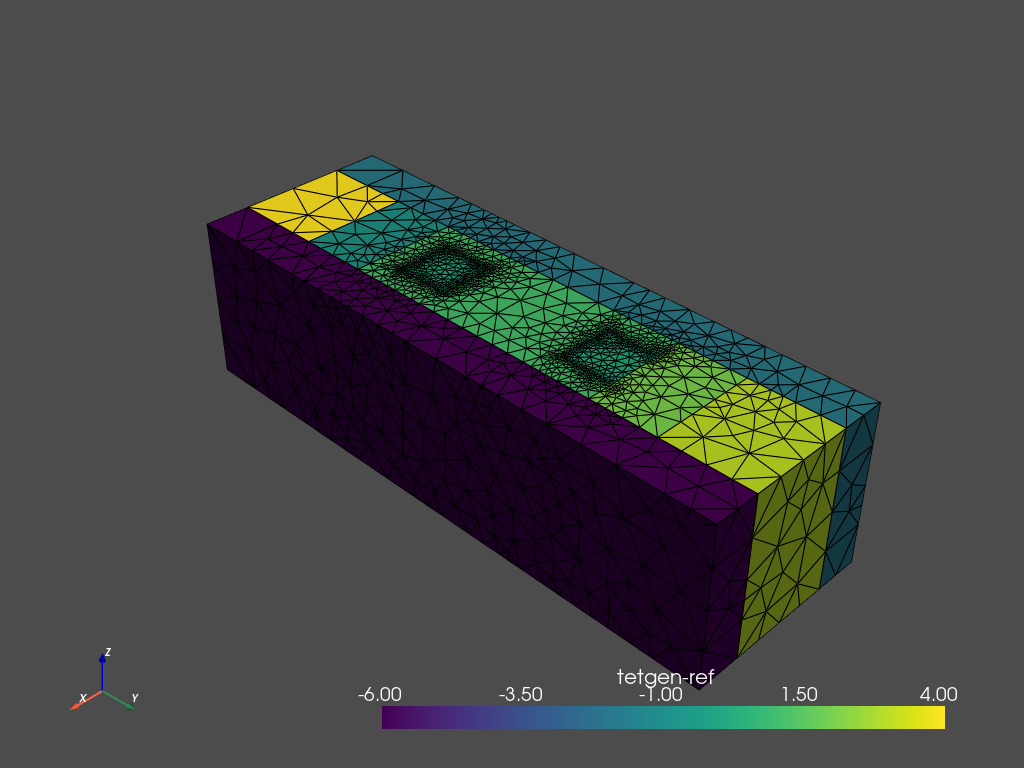

In [5]:
tetras = mesher.tetrahedralize(opts='-pAq -a10000')
tetras.plot_pyvista(jupyter_backend='static', show_edges=True)